# Models Examples

First we must do some setup

In [1]:
import chimeric_tools.Simulation as ctc
import chimeric_tools.Data as ctd
import chimeric_tools.models as ctm
from datetime import date
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/envs/science/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Training Simulated Data

This is the only example you will need in this module. We are going to use simulated data and make a forecasts 1, 2, 3, and 4 weeks ahead for each week starting 15 weeks after the `start_date`.

In [7]:
bs = ctc.COVID(start_date="2020-01-01", end_date="2021-07-31", geo_values=["US", "42095"], include=["cases"]).simulate("auto", 5)
preds = ctm.train_simulated_data(bs, ["AR3", "AR6", "ridge"], target="cases")

ForecasterAutoreg 
Regressor: Ridge() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window size: 15 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 29] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001} 
Creation date: 2022-09-01 12:54:26 
Last fit date: 2022-09-01 12:54:26 
Skforecast version: 0.4.3 

ForecasterAutoreg 
Regressor: Ridge() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window size: 15 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 30] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'p

#### Plotting the data

Now it is time to plot the data to show what has actually happened under the hood

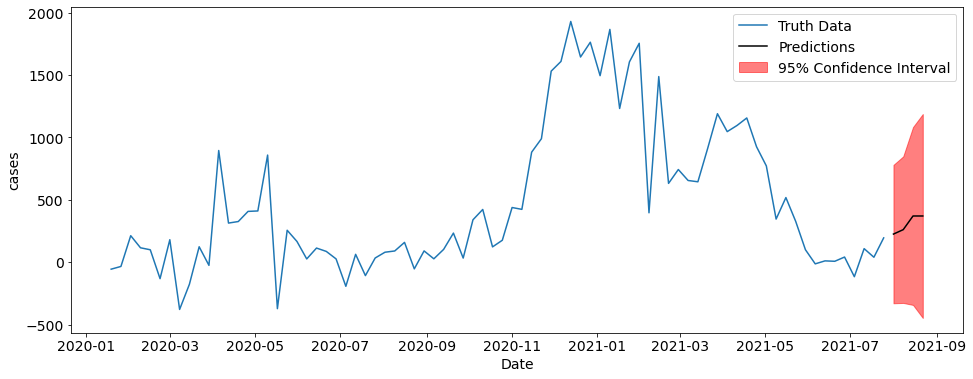

In [8]:
mask = (preds.sim == 0) & (preds.forecast_date == date(2021, 7, 25)) & (preds.model == "AR6")
sub_data = bs.loc[bs.sim == 0]
sub_preds = preds.loc[mask]
ctm.plot_single_predictions(sub_data, sub_preds, "cases")

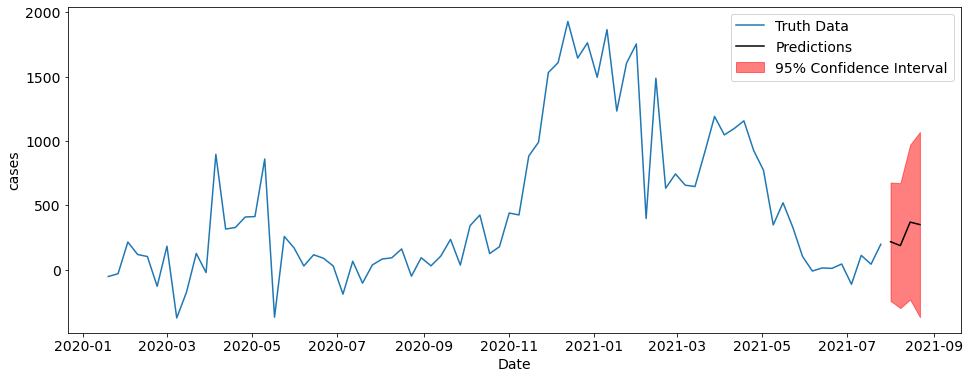

In [9]:
mask = (preds.sim == 0) & (preds.forecast_date == date(2021, 7, 25)) & (preds.model == "ridge")
sub_data = bs.loc[bs.sim == 0]
sub_preds = preds.loc[mask]
ctm.plot_single_predictions(sub_data, sub_preds, "cases")